### Importing Libraries

In [1]:
import numpy as np
import tensorflow as tf
import cv2
from google.cloud import storage
import io
from PIL import Image
import sys, os, inspect
currentdir = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))
parentdir = os.path.dirname(currentdir)
sys.path.insert(2,parentdir) 
from model.image_utils import *
sys.path.append('../model')
import image_utils

### Obtaining the data

In [2]:
path = '../../Datasets/train_32X32.mat'
svhnx,svhny = get_svhn_xy(path) # 

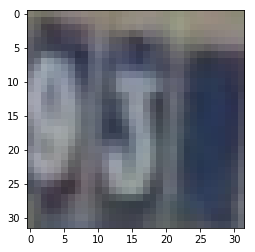

In [3]:
show_1(svhnx[7])

In [4]:
imgs1 = taking_labels(svhnx,svhny,3) # We select labels to make a subset of the images. 

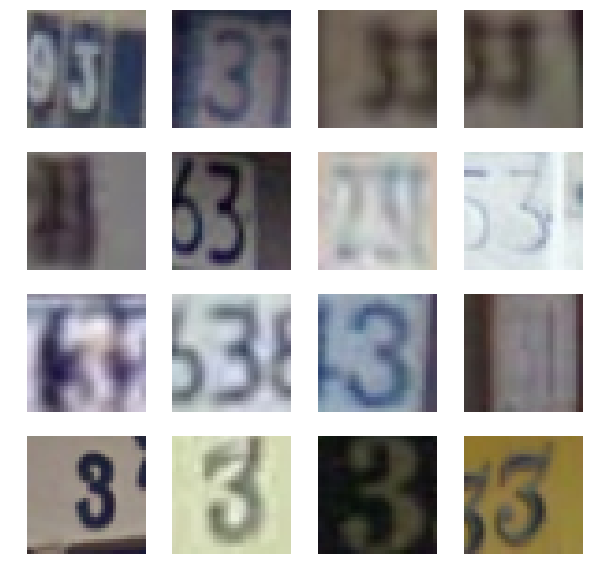

In [5]:
# Lets see our images
ImageCollector.show(None,imgs1)

In [6]:
images = resize_normal_svhn(imgs1) # We will resize them to have a 64X64 size and then normalize the data

In [7]:
## Add noise
images_wnoise = add_noise(images, 1, 5)

In [8]:
# Notebook auto reloads code. (Ref: http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython)
% load_ext autoreload
% autoreload 2
#train the model - generator and discriminator 
from model.dcgan import DCGAN

tf.reset_default_graph()
dcgan = DCGAN(batch_size=64,
              z_dim=100,
              model_name='DCGAN',
              data_source='SVHN',
              z_dist='norm')
dcgan.train(images_wnoise, learning_rate=0.0001, iters=1600)

conv_0_(64, 4, 4, 512)
conv_0_norm_(64, 4, 4, 512)
conv_0_relu_(64, 4, 4, 512)
conv_1_(64, 8, 8, 256)
conv_1_norm_(64, 8, 8, 256)
conv_1_relu_(64, 8, 8, 256)
conv_2_(64, 16, 16, 128)
conv_2_norm_(64, 16, 16, 128)
conv_2_relu_(64, 16, 16, 128)
conv_3_(64, 32, 32, 64)
conv_3_norm_(64, 32, 32, 64)
conv_3_relu_(64, 32, 32, 64)
conv_4_(64, 64, 64, 3)
(64, 64, 64, 3)
(64, 64, 64, 3)
Building my DCGAN
X_train size 8497
new size 8497
Step: 0, D_loss: 1.4823931455612183, G_loss: 0.420732319355011
../SVHN/results/0.jpg
Step: 100, D_loss: 0.85907381772995, G_loss: 1.9398436546325684
../SVHN/results/100.jpg
Step: 200, D_loss: 0.3076302409172058, G_loss: 3.4342169761657715
../SVHN/results/200.jpg
Step: 300, D_loss: 0.2439885437488556, G_loss: 3.425252914428711
../SVHN/results/300.jpg
Step: 400, D_loss: 0.05757860466837883, G_loss: 5.6289963722229
../SVHN/results/400.jpg
Step: 500, D_loss: 0.46398136019706726, G_loss: 2.6148698329925537
../SVHN/results/500.jpg
Step: 600, D_loss: 0.269528329372406, G

KeyboardInterrupt: 

In [9]:
# show the graph
from model.cnn_jupyter_tensorboard import show_graph 
tf.reset_default_graph()
with tf.Session() as sess:
    saver = tf.train.import_meta_graph('../SVHN/checkpoints/DCGAN.ckpt.meta')
    graph = tf.get_default_graph()
    show_graph(graph)

In [ ]:
mypath = '../SVHN/results'

In [ ]:
pretty_viz(mypath,'svhn1',mypath) # Visualize the iterations.